In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
import pydotplus
from IPython.display import Image
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

Q5.Use Naive bayes, K-nearest, and Decision tree classification algorithms and build classifiers.Divide the data set into training and test set. Compare the accuracy of the different classifiers under the following situations:

5.1 a) Training set=75% Test set=25%  b) Training set=66.6%(2/3rd of total),Test set=33.3%

5.2 Training set is chosen by i) hold out method ii) Randomsubsampling iii) Cross-Validation. Compare the accuracy of the classifiers obtained.

5.3 Data is scaled to standard format.

In [ ]:
import sklearn
from sklearn.datasets import *
dir(sklearn.datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_class

In [ ]:
iris=load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
print(iris.filename)
print(iris.feature_names)


/usr/local/lib/python3.7/dist-packages/sklearn/datasets/data/iris.csv
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
iris=pd.read_csv('/content/gdrive/MyDrive/iris.csv')
print(iris)
#preproces=True;
preproces=False;

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [ ]:
iris=iris.drop_duplicates()

#missing_values = iris.isnull().sum()
#print(missing_values)

#df = pd.DataFrame(iris)
#print(df)
#duplicate_Row = iris[df.duplicated()]

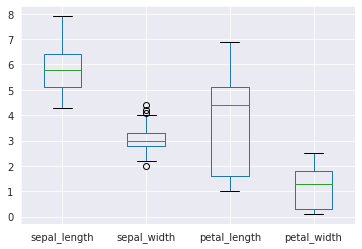

In [ ]:
iris.boxplot()

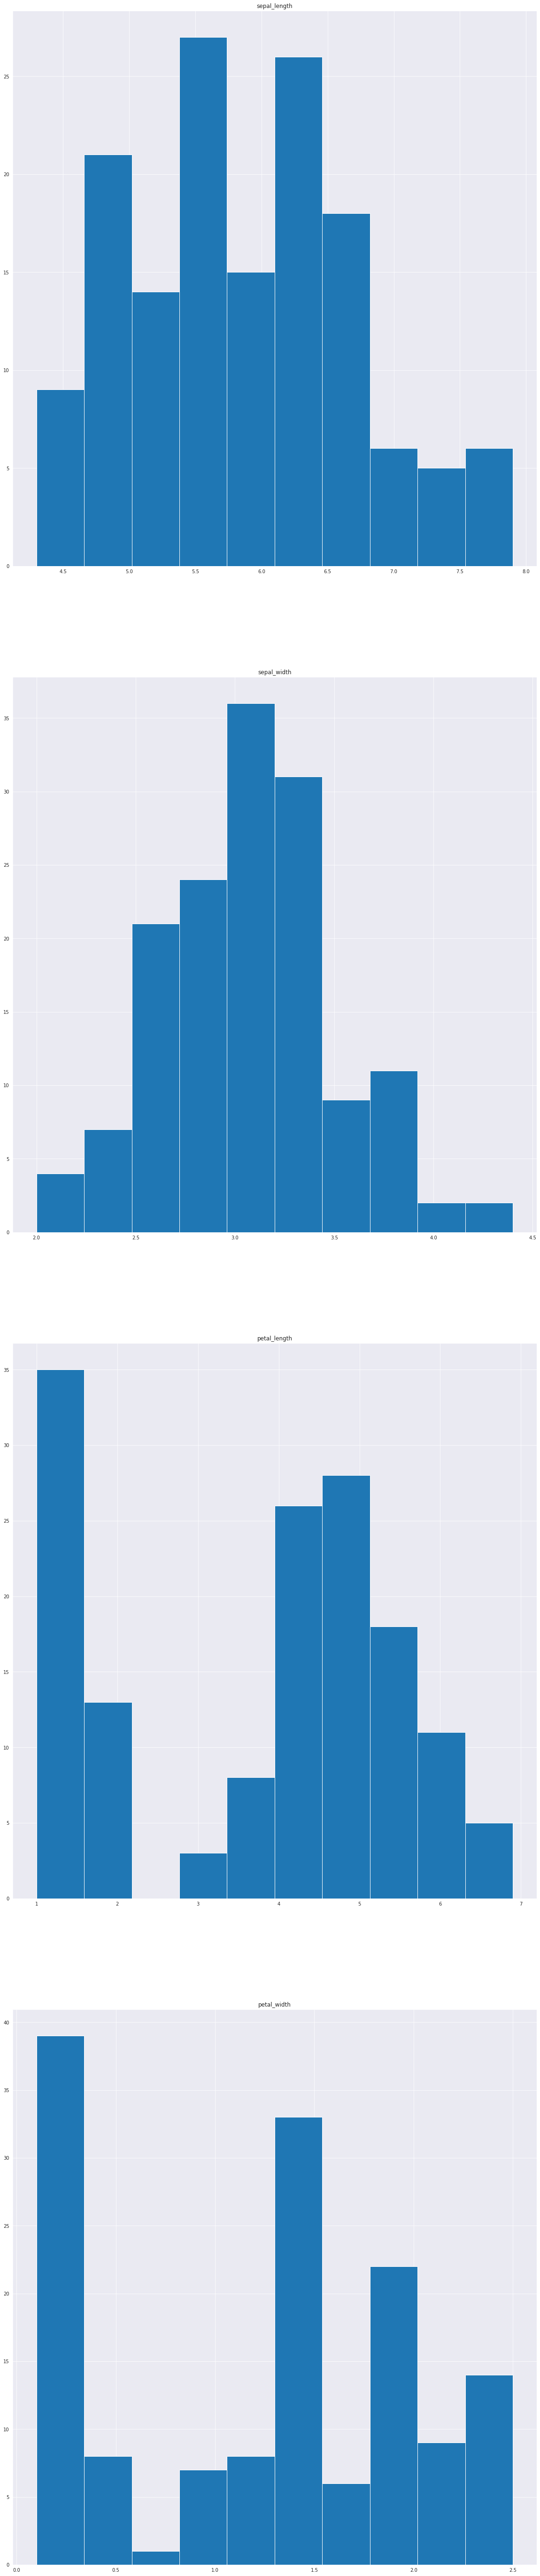

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize = [20, 100]) 
for i in range(0,iris.shape[1]-1):
  column=iris.columns[i]
  plt.subplot(4, 1, i+1)
  plt.title(column)
  plt.hist(iris[column])

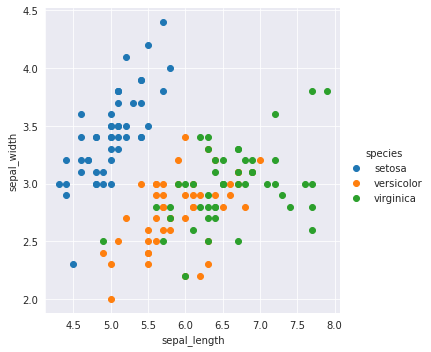

In [ ]:
sns.set_style("darkgrid")
sns.FacetGrid(iris, hue ="species", height = 5).map(plt.scatter, 'sepal_length', 'sepal_width').add_legend()

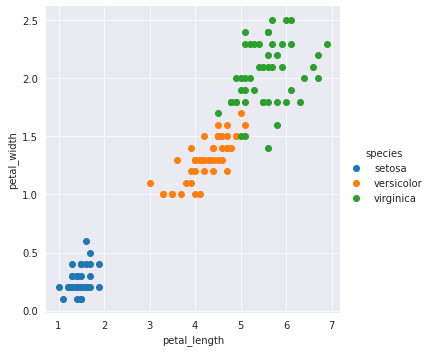

In [ ]:
sns.set_style("darkgrid")
sns.FacetGrid(iris, hue ="species", height = 5).map(plt.scatter, 'petal_length', 'petal_width').add_legend()

In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
X=iris.values[:,:-1]
Y=iris.values[:,-1]

In [ ]:
print(X.shape)
print(Y.shape)

(147, 4)
(147,)


In [ ]:
classLabels=np.unique(Y)
classLabels

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
iris['species'].value_counts()

versicolor    50
virginica     49
setosa        48
Name: species, dtype: int64

In [ ]:
if preproces == True :
  X=preprocessing.scale(X)
else:
  X=X
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.0 3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.0 1.4 0.1]
 [4.3 3.0 1.1 0.1]
 [5.8 4.0 1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.0 0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.0 3.0 1.6 0.2]
 [5.0 3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [5.0 3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.4 3.0 1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.0 3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.0 3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.0 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.0 3.3 1.4 0.2]
 [7.0 3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.0 1.3]
 [6.5 2.8 4.

In [ ]:
test_val = 0.25
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=test_val)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(110, 4)
(37, 4)
(110,)
(37,)


In [ ]:
#help(DecisionTreeClassifier())

In [ ]:
DTclassifer = DecisionTreeClassifier().fit(X_train,Y_train)

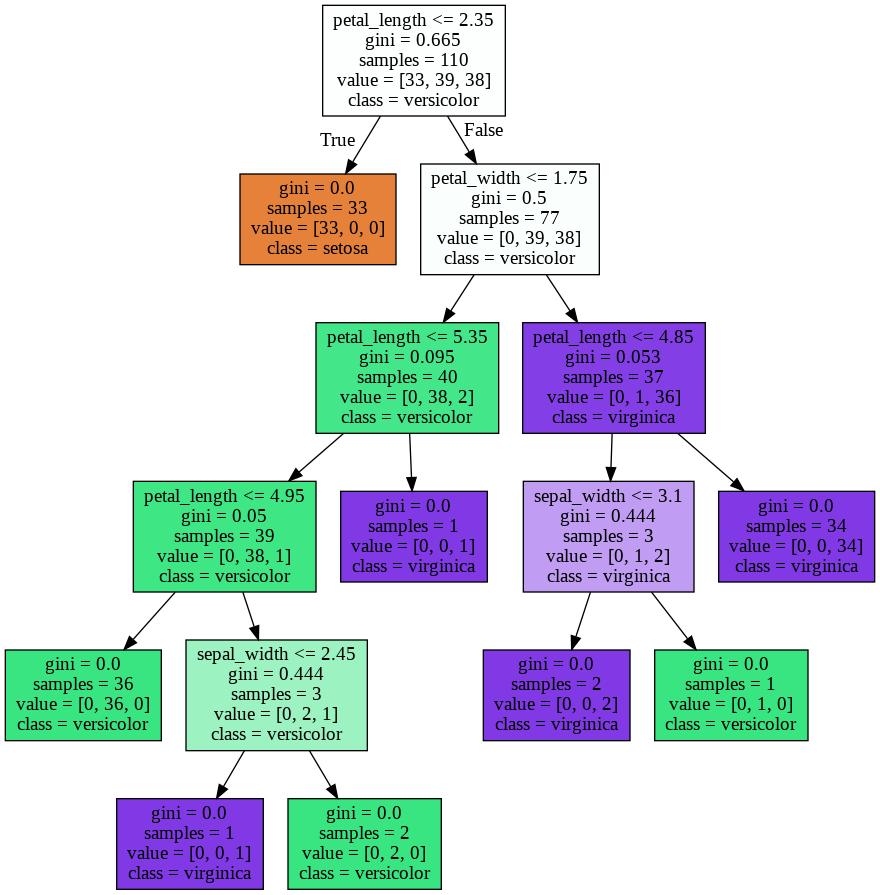

In [ ]:

dot_data=export_graphviz(DTclassifer, feature_names=iris.columns[:-1], class_names=classLabels, filled=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
print(Y_test)
Y_predict=DTclassifer.predict(X_test)
print(Y_predict)

['versicolor' 'setosa' 'virginica' 'setosa' 'versicolor' 'virginica'
 'versicolor' 'virginica' 'setosa' 'setosa' 'virginica' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'virginica' 'versicolor'
 'versicolor' 'setosa' 'setosa' 'versicolor' 'setosa' 'virginica'
 'virginica' 'virginica' 'setosa' 'versicolor' 'setosa' 'virginica']
['versicolor' 'setosa' 'virginica' 'setosa' 'versicolor' 'virginica'
 'versicolor' 'virginica' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'virginica' 'versicolor'
 'versicolor' 'setosa' 'setosa' 'versicolor' 'setosa' 'virginica'
 'virginica' 'virginica' 'setosa' 'versicolor' 'setosa' 'versicolor']


In [ ]:
accuracy_score(Y_test, Y_predict)

0.9459459459459459

In [ ]:
conf=confusion_matrix(Y_test, Y_predict)
conf

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  2,  9]])

In [ ]:
!pip install mlxtend --upgrade --no-deps

Requirement already up-to-date: mlxtend in /usr/local/lib/python3.7/dist-packages (0.18.0)


In [ ]:
#import mlxtend
#help(mlxtend)

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8de426b710>)

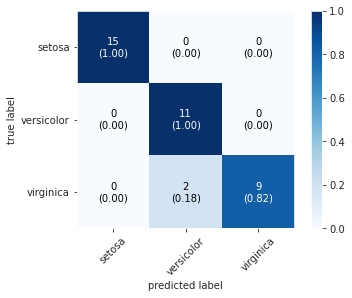

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(conf_mat=conf, colorbar=True, show_absolute=True, show_normed=True, class_names=classLabels)

In [ ]:
clf_report=classification_report(Y_test, Y_predict, target_names=classLabels, digits=5, output_dict=True)
print(clf_report)

{'setosa': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 15}, 'versicolor': {'precision': 0.8461538461538461, 'recall': 1.0, 'f1-score': 0.9166666666666666, 'support': 11}, 'virginica': {'precision': 1.0, 'recall': 0.8181818181818182, 'f1-score': 0.9, 'support': 11}, 'accuracy': 0.9459459459459459, 'macro avg': {'precision': 0.9487179487179488, 'recall': 0.9393939393939394, 'f1-score': 0.9388888888888888, 'support': 37}, 'weighted avg': {'precision': 0.9542619542619543, 'recall': 0.9459459459459459, 'f1-score': 0.9454954954954955, 'support': 37}}


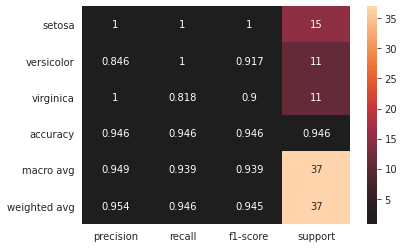

In [ ]:

sns.heatmap(pd.DataFrame(clf_report).T, annot=True, fmt='.3g',center=True)#.T is for transpose
                                                                          #.3g is used to display values till three decimal places

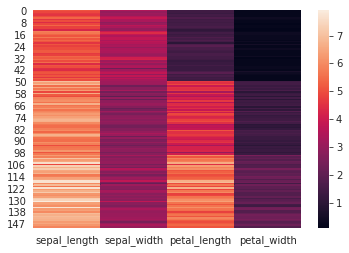

In [ ]:
sns.heatmap(iris.iloc[: ,:-1 ])

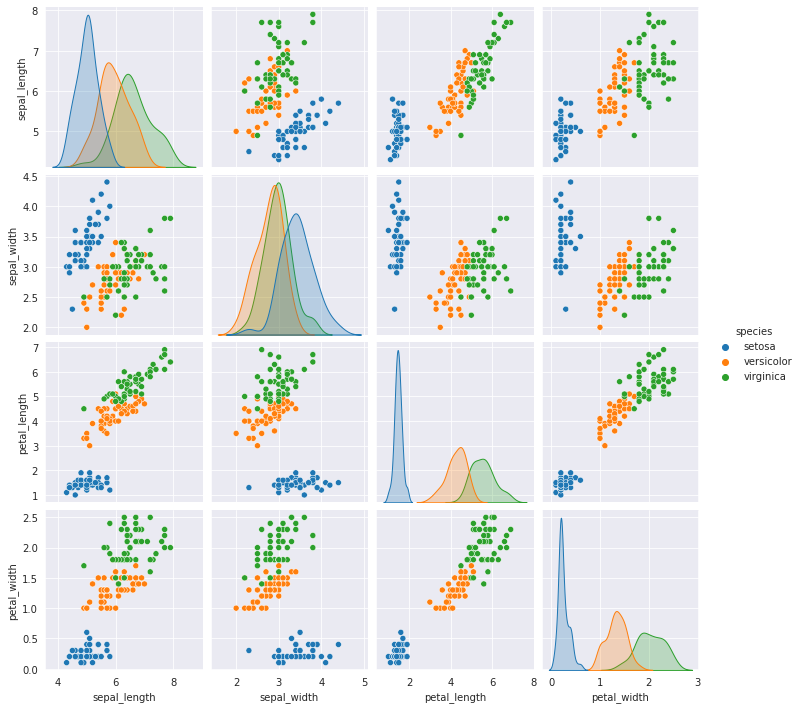

In [ ]:
sns.pairplot(iris,hue='species')

In [ ]:
def compareClassifiers1(split_ratio):
  X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=split_ratio)
  clf = DecisionTreeClassifier(criterion='gini')
  clf=clf.fit(X_train,Y_train)
  Y_pred=clf.predict(X_test)
  a1=accuracy_score(Y_test,Y_pred)
  print("Accuracy in decision tree base classifier:")
  print(a1)
  print("confusion matrix is:")
  confuss_mat=confusion_matrix(Y_test,Y_pred)
  print(confuss_mat)
  print("classification report:")
  clf_report=classification_report(Y_test, Y_pred, target_names=classLabels,digits=4,output_dict=True)
  print(clf_report)
  
  #KNN
  X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=split_ratio)
  clf = KNeighborsClassifier(n_neighbors=4)
  clf=clf.fit(X_train,Y_train)
  Y_pred=clf.predict(X_test)
  a2=accuracy_score(Y_test,Y_pred)
  print("Accuracy in KNN base classifier:")
  print(a2)
  print("confusion matrix is:")
  confuss_mat=confusion_matrix(Y_test,Y_pred)
  print(confuss_mat)
  print("classification report:")
  clf_report=classification_report(Y_test, Y_pred, target_names=classLabels,digits=4,output_dict=True)
  print(clf_report)
  
  #Naive bayes
  X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=split_ratio)
  clf = GaussianNB()
  clf=clf.fit(X_train,Y_train)
  Y_pred=clf.predict(X_test)
  a3=accuracy_score(Y_test,Y_pred)
  print("Accuracy in naive bayes base classifier:")
  print(a1)
  print("confusion matrix is:")
  confuss_mat=confusion_matrix(Y_test,Y_pred)
  print(confuss_mat)
  print("classification report:")
  clf_report=classification_report(Y_test, Y_pred, target_names=classLabels,digits=4,output_dict=True)
  print(clf_report)
  return a1,a2,a3
a=compareClassifiers1(test_val)

Accuracy in decision tree base classifier:
0.918918918918919
confusion matrix is:
[[ 9  0  0]
 [ 0  9  3]
 [ 0  0 16]]
classification report:
{'setosa': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 9}, 'versicolor': {'precision': 1.0, 'recall': 0.75, 'f1-score': 0.8571428571428571, 'support': 12}, 'virginica': {'precision': 0.8421052631578947, 'recall': 1.0, 'f1-score': 0.9142857142857143, 'support': 16}, 'accuracy': 0.918918918918919, 'macro avg': {'precision': 0.9473684210526315, 'recall': 0.9166666666666666, 'f1-score': 0.9238095238095237, 'support': 37}, 'weighted avg': {'precision': 0.9317211948790896, 'recall': 0.918918918918919, 'f1-score': 0.9166023166023165, 'support': 37}}
Accuracy in KNN base classifier:
0.972972972972973
confusion matrix is:
[[ 7  0  0]
 [ 0 11  0]
 [ 0  1 18]]
classification report:
{'setosa': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 7}, 'versicolor': {'precision': 0.9166666666666666, 'recall': 1.0, 'f1-score': 0.95652

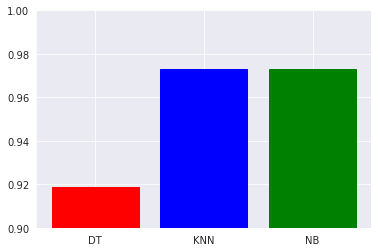

In [ ]:
l = ['DT', 'KNN', 'NB']
plt.ylim(0.9,1.0)
barlist=plt.bar(l,a)
barlist[0].set_color('r')
barlist[1].set_color('b')
barlist[2].set_color('g')
plt.show()

In [ ]:
k=10  # 3 for vertebrate dataset
def compareClassifiers2(k):
  score=cross_val_score(DecisionTreeClassifier(),X,Y,cv=k)
  print(" K fold cross verlidation for Decision tree: ")
  print(score)
  s1=score.mean()
  print(s1)
  score=cross_val_score( KNeighborsClassifier(),X,Y,cv=k)
  print(" K fold cross verlidation for k-nearest neighbors: ")
  print(score)
  s2=score.mean()
  print(s2)
  score=cross_val_score( GaussianNB(),X,Y,cv=k)
  print(" K fold cross verlidation for naive bayes: ")
  print(score)
  s3=score.mean()
  print(s3)
  return s1,s2,s3
s=compareClassifiers2(12)  

 K fold cross verlidation for Decision tree: 
[1.         0.92307692 1.         1.         0.83333333 1.
 0.91666667 0.91666667 1.         1.         1.         1.        ]
0.9658119658119659
 K fold cross verlidation for k-nearest neighbors: 
[1.         0.92307692 1.         1.         0.91666667 0.91666667
 0.91666667 0.91666667 1.         1.         1.         1.        ]
0.9658119658119658
 K fold cross verlidation for naive bayes: 
[0.92307692 0.92307692 1.         1.         0.83333333 1.
 0.91666667 1.         0.83333333 1.         1.         1.        ]
0.952457264957265


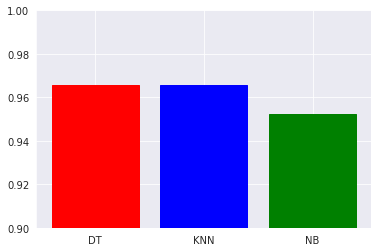

In [ ]:
#sns.histplot(data=s)
l = ['DT', 'KNN', 'NB']
plt.ylim(0.9,1.0)
barlist=plt.bar(l,s)
barlist[0].set_color('r')
barlist[1].set_color('b')
barlist[2].set_color('g')
plt.show()

In [ ]:
numTimes=10

accuracy=list()
for i in range(numTimes):
  X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=test_val)
  DTclassifer = DecisionTreeClassifier(criterion="entropy").fit(X_train,Y_train)
  Y_predict=DTclassifer.predict(X_test)
  accuracy.append(accuracy_score(Y_test, Y_predict))
print(sum(accuracy)/numTimes)

0.9351351351351352


In [ ]:
k=10
scores=cross_val_score(DecisionTreeClassifier(),X,Y,cv=k)
print(scores,scores.mean())

[1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 0.92857143 1.         1.        ] 0.9528571428571428


In [ ]:
test_val1 =(1/3)
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X,Y,test_size=test_val)

In [ ]:
print(X_train1.shape)
print(X_test1.shape)
print(Y_train1.shape)
print(Y_test1.shape)

(110, 4)
(37, 4)
(110,)
(37,)


In [ ]:
#help(DecisionTreeClassifier())

In [ ]:
DTclassifer = DecisionTreeClassifier().fit(X_train1,Y_train1)

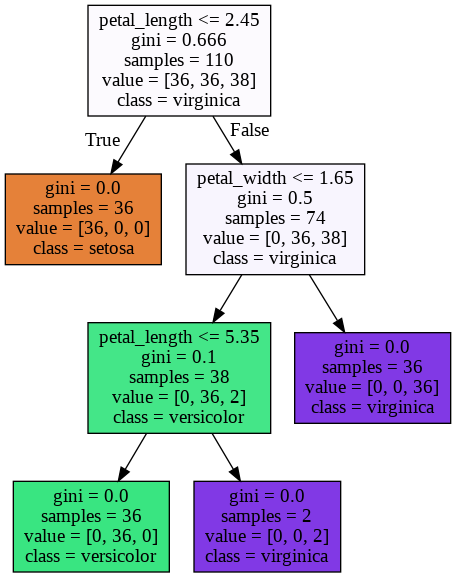

In [ ]:

dot_data1=export_graphviz(DTclassifer, feature_names=iris.columns[:-1], class_names=classLabels, filled=True)
graph1=pydotplus.graph_from_dot_data(dot_data1)
Image(graph1.create_png())

In [ ]:
print(Y_test1)
Y_predict1=DTclassifer.predict(X_test1)
print(Y_predict1)

['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'versicolor' 'versicolor' 'setosa' 'setosa' 'virginica' 'setosa'
 'versicolor' 'virginica' 'setosa' 'virginica' 'versicolor' 'versicolor'
 'setosa' 'virginica' 'virginica' 'versicolor' 'versicolor' 'virginica'
 'versicolor' 'virginica' 'versicolor' 'setosa' 'setosa' 'setosa'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'setosa' 'versicolor'
 'virginica']
['versicolor' 'versicolor' 'setosa' 'versicolor' 'setosa' 'virginica'
 'versicolor' 'versicolor' 'setosa' 'setosa' 'virginica' 'setosa'
 'versicolor' 'virginica' 'setosa' 'virginica' 'versicolor' 'versicolor'
 'setosa' 'virginica' 'virginica' 'versicolor' 'versicolor' 'virginica'
 'versicolor' 'virginica' 'versicolor' 'setosa' 'setosa' 'setosa'
 'versicolor' 'virginica' 'virginica' 'setosa' 'setosa' 'versicolor'
 'virginica']


In [ ]:
accuracy_score(Y_test1, Y_predict1)

0.8918918918918919

In [ ]:
conf1=confusion_matrix(Y_test1, Y_predict1)
conf1

array([[12,  0,  0],
       [ 0, 12,  2],
       [ 0,  2,  9]])

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8de3776ed0>)

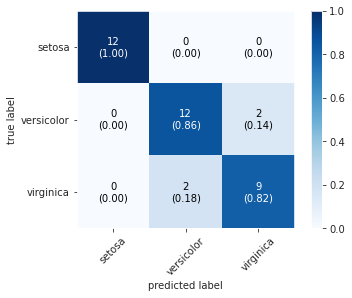

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(conf_mat=conf1, colorbar=True, show_absolute=True, show_normed=True, class_names=classLabels)

In [ ]:
clf_report1=classification_report(Y_test1, Y_predict1, target_names=classLabels, digits=5, output_dict=True)
print(clf_report1)

{'setosa': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 12}, 'versicolor': {'precision': 0.8571428571428571, 'recall': 0.8571428571428571, 'f1-score': 0.8571428571428571, 'support': 14}, 'virginica': {'precision': 0.8181818181818182, 'recall': 0.8181818181818182, 'f1-score': 0.8181818181818182, 'support': 11}, 'accuracy': 0.8918918918918919, 'macro avg': {'precision': 0.8917748917748919, 'recall': 0.8917748917748919, 'f1-score': 0.8917748917748919, 'support': 37}, 'weighted avg': {'precision': 0.8918918918918919, 'recall': 0.8918918918918919, 'f1-score': 0.8918918918918919, 'support': 37}}


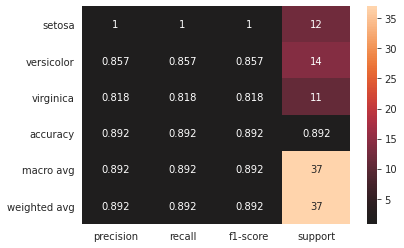

In [ ]:
import seaborn as sns
sns.heatmap(pd.DataFrame(clf_report1).T, annot=True, fmt='.3g',center=True)#.T is for transpose
                                                                          #.3g is used to display values till three decimal places

In [ ]:
numTimes=10

accuracy=list()
for i in range(numTimes):
  X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X,Y,test_size=test_val)
  DTclassifer = DecisionTreeClassifier(criterion="entropy").fit(X_train1,Y_train1)
  Y_predict1=DTclassifer.predict(X_test1)
  accuracy.append(accuracy_score(Y_test1, Y_predict1))
print(sum(accuracy)/numTimes)

0.9621621621621623


In [ ]:
a1=compareClassifiers1(test_val1)

Accuracy in decision tree base classifier:
0.9387755102040817
confusion matrix is:
[[16  0  0]
 [ 0 14  2]
 [ 0  1 16]]
classification report:
{'setosa': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 16}, 'versicolor': {'precision': 0.9333333333333333, 'recall': 0.875, 'f1-score': 0.9032258064516129, 'support': 16}, 'virginica': {'precision': 0.8888888888888888, 'recall': 0.9411764705882353, 'f1-score': 0.9142857142857143, 'support': 17}, 'accuracy': 0.9387755102040817, 'macro avg': {'precision': 0.9407407407407407, 'recall': 0.9387254901960785, 'f1-score': 0.9391705069124424, 'support': 49}, 'weighted avg': {'precision': 0.9396825396825397, 'recall': 0.9387755102040817, 'f1-score': 0.9386626540016929, 'support': 49}}
Accuracy in KNN base classifier:
0.9795918367346939
confusion matrix is:
[[17  0  0]
 [ 0 16  0]
 [ 0  1 15]]
classification report:
{'setosa': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 17}, 'versicolor': {'precision': 0.941176470588235

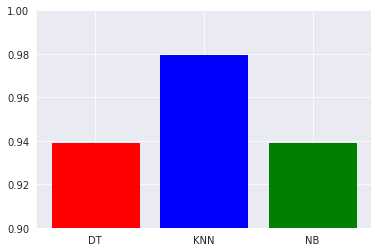

In [ ]:
l = ['DT', 'KNN', 'NB']
plt.ylim(0.9,1.0)
barlist=plt.bar(l,a1)
barlist[0].set_color('r')
barlist[1].set_color('b')
barlist[2].set_color('g')
plt.show()

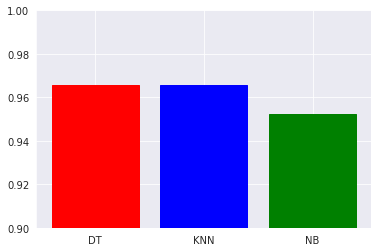

In [ ]:
#sns.histplot(data=s)
l = ['DT', 'KNN', 'NB']
plt.ylim(0.9,1.0)
barlist=plt.bar(l,s)
barlist[0].set_color('r')
barlist[1].set_color('b')
barlist[2].set_color('g')
plt.show()

VERTIBRATE DATASET

In [ ]:
vertibrate=pd.read_csv('/content/gdrive/MyDrive/vertebrate.csv')
preproces=True
print(vertibrate)

             Name  Warm-blooded  Gives Birth  ...  Has Legs  Hibernates       Class
0           human             1            1  ...         1           0     mammals
1          python             0            0  ...         0           1    reptiles
2          salmon             0            0  ...         0           0      fishes
3           whale             1            1  ...         0           0     mammals
4            frog             0            0  ...         1           1  amphibians
5          komodo             0            0  ...         1           0    reptiles
6             bat             1            1  ...         1           1     mammals
7          pigeon             1            0  ...         1           0       birds
8             cat             1            1  ...         1           0     mammals
9   leopard shark             0            1  ...         0           0      fishes
10         turtle             0            0  ...         1           0    r

In [ ]:
vertibrate=vertibrate.drop_duplicates()